### Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [97]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import prepare
import acquire
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('darkgrid')

### Store data

In [19]:
#get data
df = prepare.store_items()

In [20]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92


In [21]:
#split data, Human based
train=df[:"2016"]
test = df["2017"]

/var/folders/yt/n2syrxfn78lfgkf_dg2j4tj80000gn/T/ipykernel_826/2242951258.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df["2017"]


In [22]:
#check shape of split
train.shape,test.shape

((730500, 16), (182500, 16))

In [23]:
#portion of test in split
test.shape[0]/df.shape[0] *100

19.98904709748083

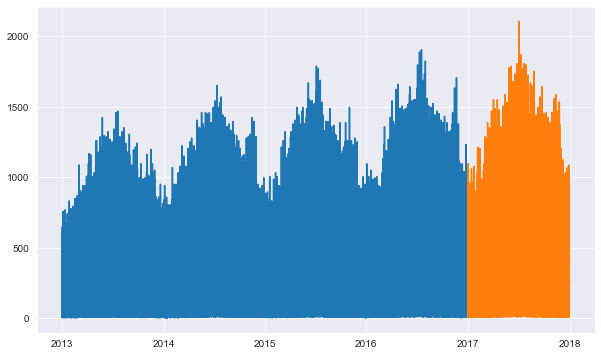

In [24]:
#visualise split
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.show()

In [25]:
#set target
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

Text(0.5, 0, 'total sales')

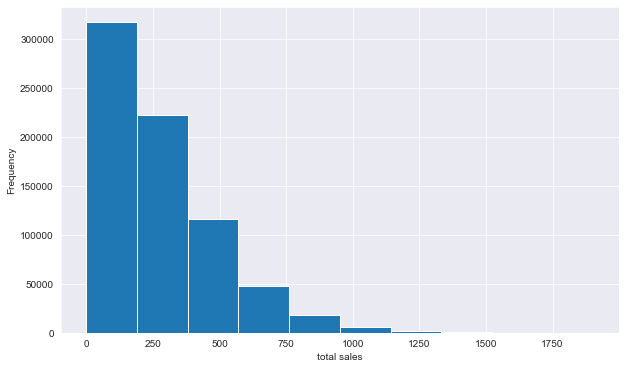

In [26]:
#visualise target
y.plot.hist()
plt.xlabel("total sales")

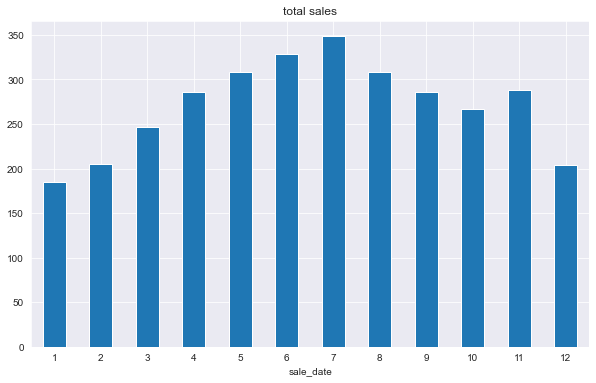

In [27]:
#plot total sales by months
y.groupby(y.index.month).mean().plot.bar(title="total sales")\
        .tick_params("x", rotation = 0)

    total sales peek in summer months

<function matplotlib.pyplot.show(close=None, block=None)>

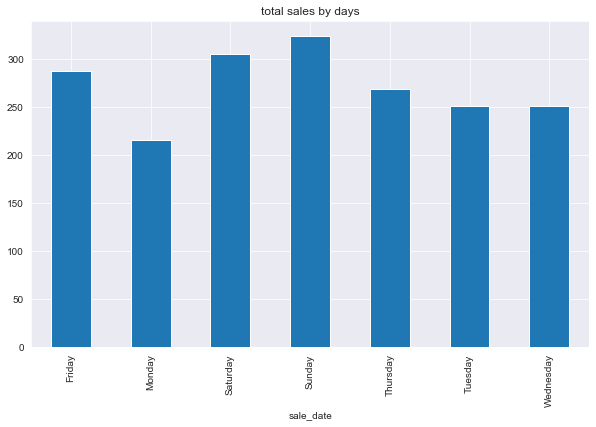

In [28]:
##plot total sales by day of week
y.groupby(y.index.day_name()).mean().plot.bar(title ="total sales by days")
plt.show

    saturaday, sunday seems to be the good day for business

how is total sales by different times  each year?

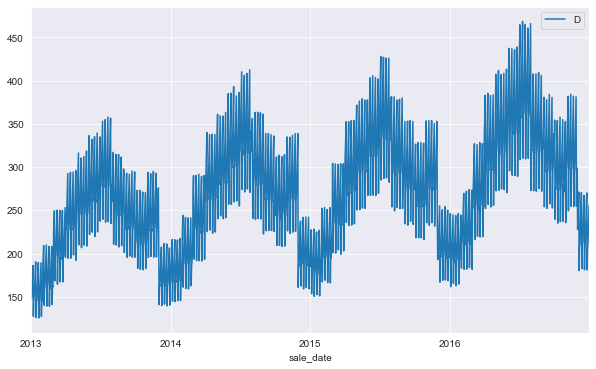

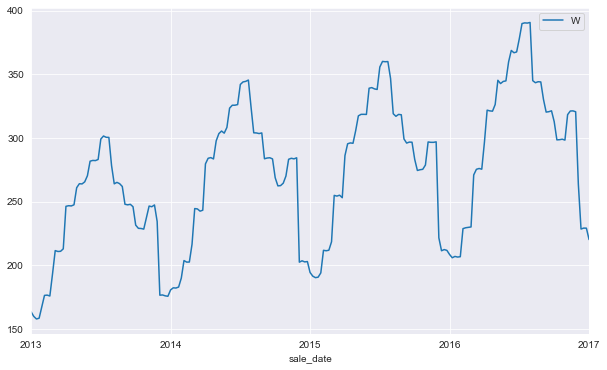

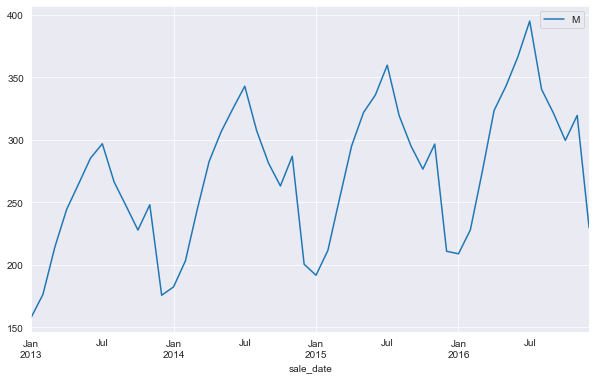

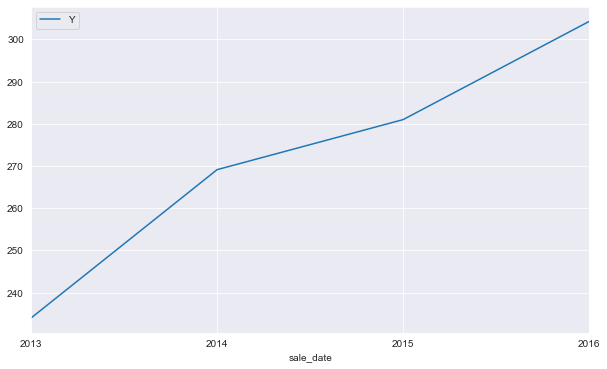

In [29]:
#make a for loop to visualise resample
different_times = ["D","W","M","Y"]
for i in different_times:
    y.resample(i).mean().plot(label = i)
    plt.legend()
    plt.show()

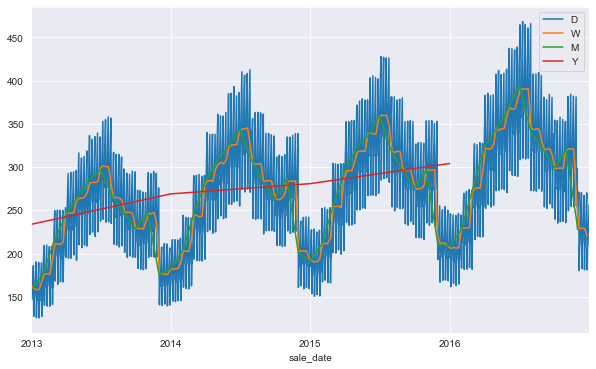

In [30]:
#for loop to visual all plot at one
different_times = ["D","W","M","Y"]
for i in different_times:
    y.resample(i).mean().plot(label = i)
    plt.legend()

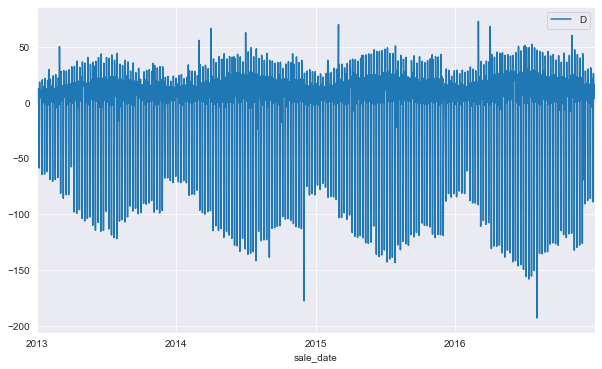

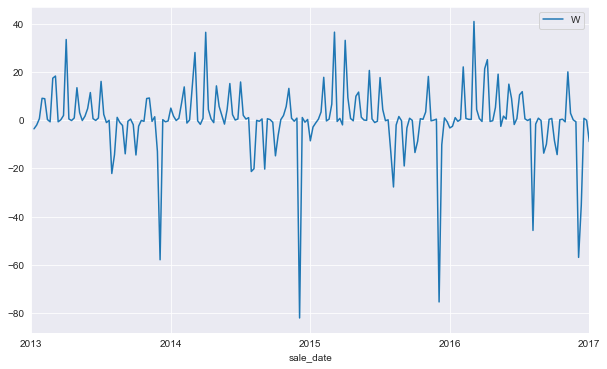

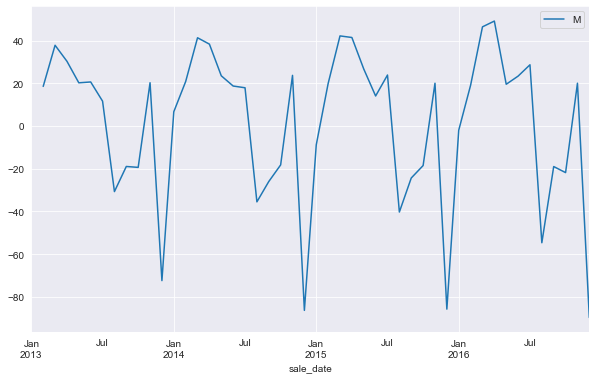

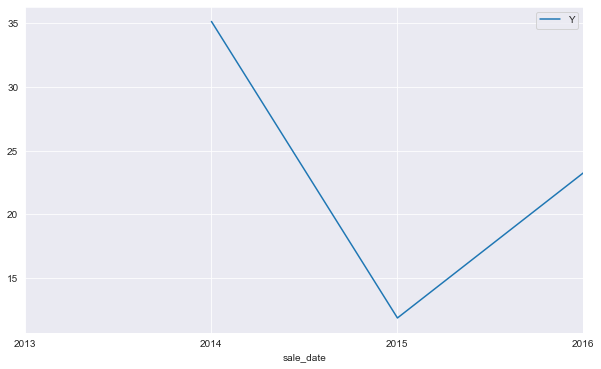

In [31]:
#make a for loop to visualise resample
different_times = ["D","W","M","Y"]
for i in different_times:
    y.resample(i).mean().diff().plot(label = i)
    plt.legend()
    plt.show()

seasonal sales

<AxesSubplot:xlabel='sale_date'>

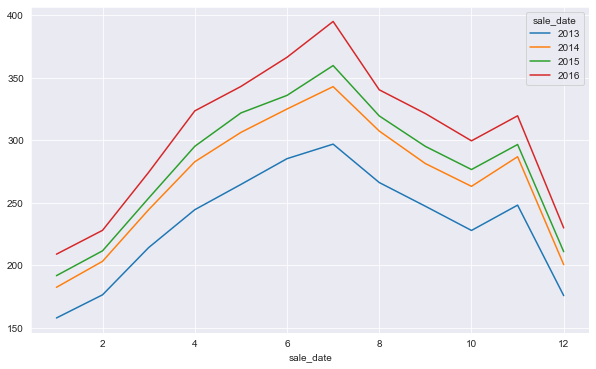

In [83]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

    sales amount each year is bigger than past years 

lets try seasonal subseries plot

In [84]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,394.953287,340.315372,321.333920,299.518321,319.532559,229.882967


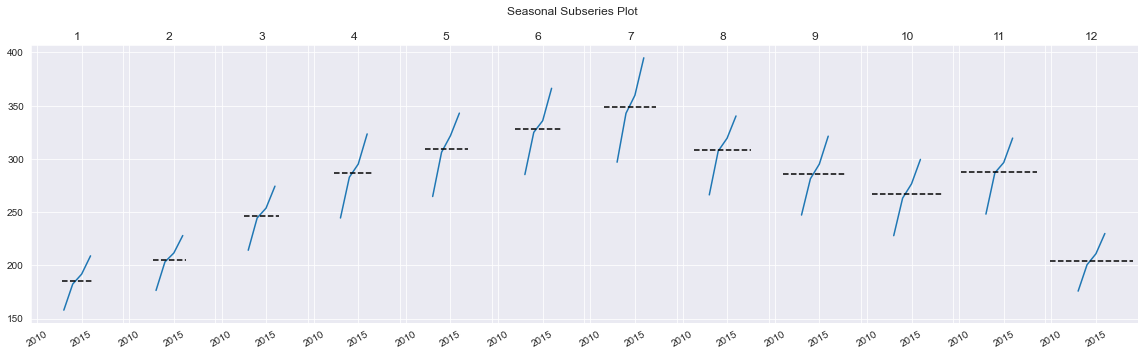

In [85]:
# unpacking my figure and axes elements as I did previously
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)


Lag plot

Text(0.5, 1.0, 'Lag plot with lag=1')

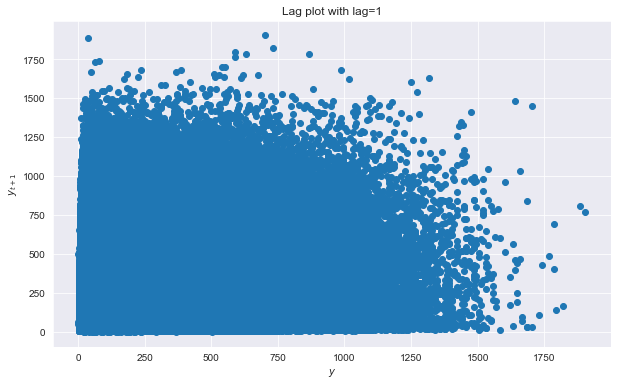

In [88]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

lag plot using pd.plotting.lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

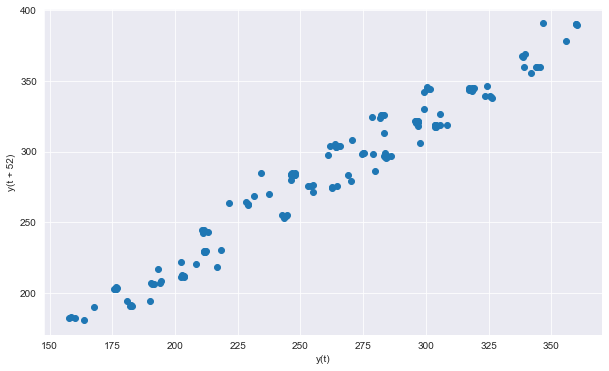

In [91]:
# use pd.plotting.lag_plot to do the same thing, but easier
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)

    pretty good correlation of total sales at 52 weeks lag

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

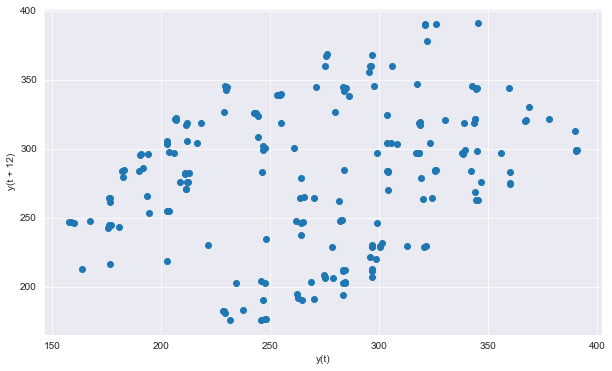

In [94]:
#lag plot 12 weeks out
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=12)

Autocorrection plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

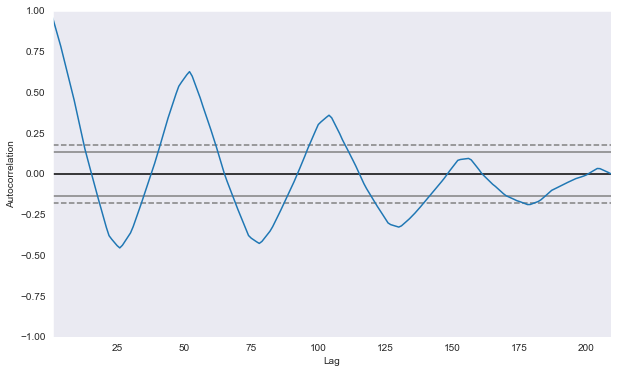

In [95]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())


Seasonal Decomposition


In [98]:
# We can use the seasonal_decompose function from the statsmodels library to perform this decomposition.
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,30.355667,NaN,-14.406312,NaN
2013-01-13,29.686286,NaN,-14.747474,NaN
2013-01-20,29.414286,NaN,-14.840886,NaN
2013-01-27,29.513714,NaN,-14.931698,NaN
2013-02-03,31.150571,NaN,-14.412598,NaN


<AxesSubplot:xlabel='sale_date'>

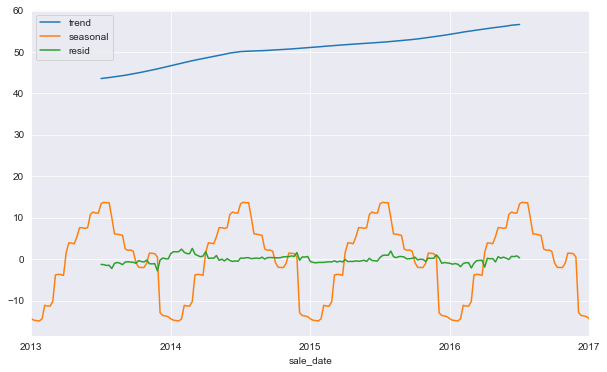

In [99]:
decomposition.iloc[:, 1:].plot()


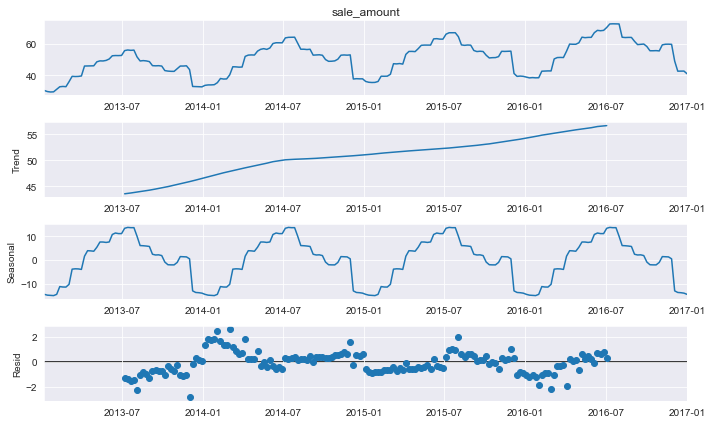

In [100]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

Area plot

In [101]:
# How can we visualize categories over time?
train = train.resample('D').mean()
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sale_amount, 4, labels=['high low', 'low', 'Mid', 'Up'])
train.groupby('sales_bin').mean()

,item_id,sale_amount,sale_id,store_id,item_price,item_upc12,item_upc14,store_zipcode,sales_total
sales_bin,,,,,,,,,
high low,25.5,35.242262,456120.721311,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,189.487351
low,25.5,45.930373,456250.172603,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,246.934608
Mid,25.5,54.626455,456355.873973,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,293.705761
Up,25.5,66.683929,456545.772603,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,358.468900


Text(0, 0.5, '% of days in the month')

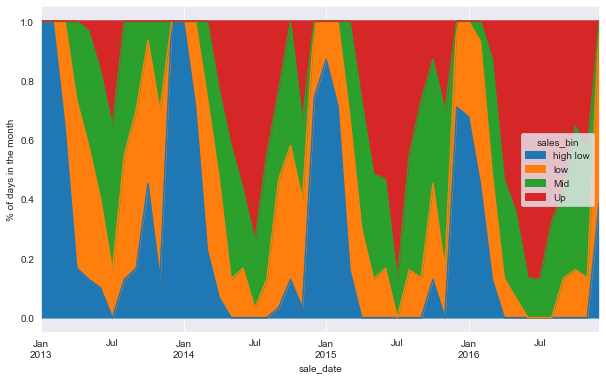

In [102]:
# How is the distribution of sales_bin changing over time?
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

/var/folders/yt/n2syrxfn78lfgkf_dg2j4tj80000gn/T/ipykernel_826/457046010.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2015']


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

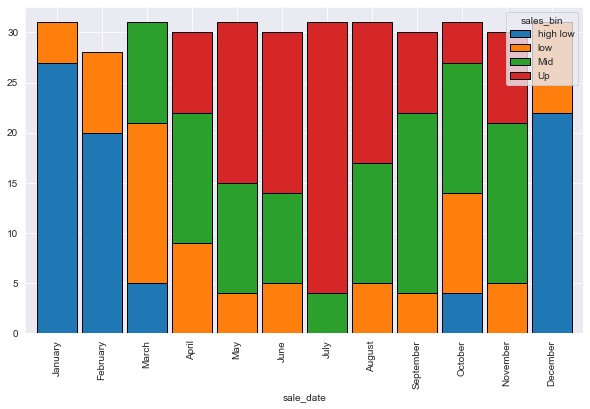

In [103]:
ax = (train['2015']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

strftime

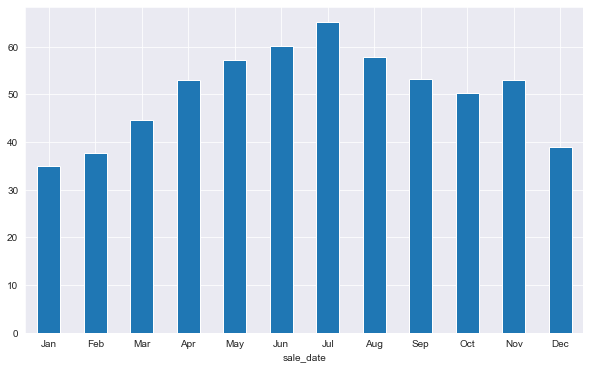

In [104]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

Matplotlib Dates

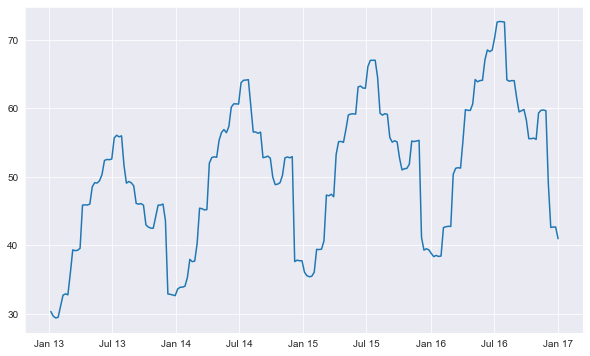

In [105]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))